In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Example

In [2]:
sns.set_theme(color_codes=True)
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


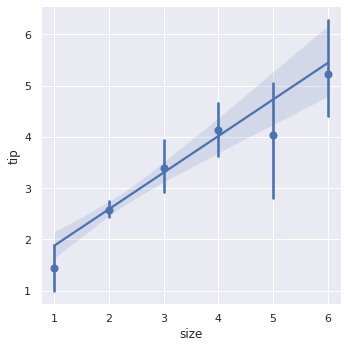

In [3]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

# Datos reales

In [4]:
df = pd.read_csv('/home/fer/Documents/cfDNA/Clinical/Concentracion_cfDNA.csv')
df = df[df['Stage'].notna()]
df['Stage'] = df['Stage'].replace({ 'I' : 1 , 'II' : 2 , 'III' : 3 })
df

,ID,Stage,Concentration
0,UEB-0205,1,0.81
1,UEB-0208,1,0.88
2,UEB-0209,2,0.36
3,UEB-0210,2,1.27
4,UEB-0211,3,1.07
5,UEB-0213,2,0.32
6,UEB-0215,3,0.56
7,UEB-0216,1,0.50
8,UEB-0218,3,3.18
9,UEB-0219,3,0.49


In [5]:
stats.pearsonr(df.Stage, df.Concentration)

(0.20861571073770202, 0.438125036844207)

In [6]:
from scipy import stats
x = list(stats.pearsonr(df.Stage, df.Concentration))
round(x[0], 4)

0.2086

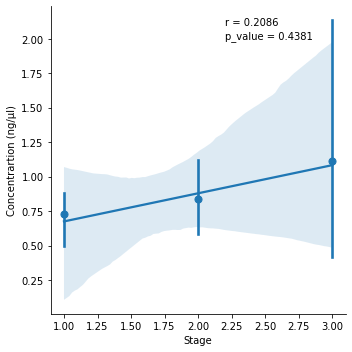

In [5]:
p = sns.lmplot(x="Stage", y="Concentration", data=df, x_estimator=np.mean);
p.set(xlabel = "Stage", ylabel = "Concentrartion (ng/μl)")
plt.text(2.2, 2.1, "r = "+  str(round(x[0], 4)), horizontalalignment='left', size=10)
plt.text(2.2, 2, "p_value = "+  str(round(x[1], 4)), horizontalalignment='left', size=10)
plt.savefig('/home/fer/LinearReg.png', dpi=300)

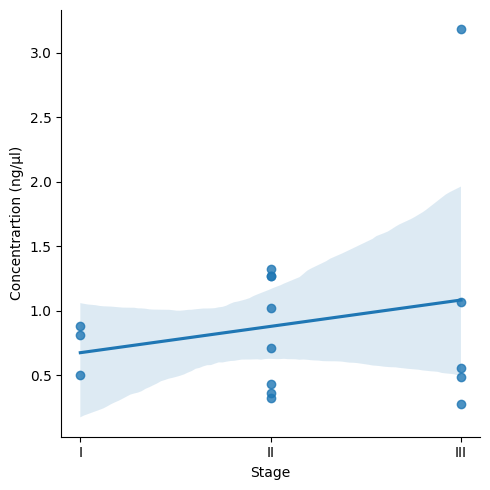

In [26]:
from matplotlib.patches import Rectangle
p = sns.lmplot(x="Stage", y="Concentration", data=df);
p.set(xlabel = "Stage", ylabel = "Concentrartion (ng/μl)")
p.set(xticks=np.arange(1,4,1))
p.set_xticklabels(['I', 'II', 'III'])
#plt.xlim(1,2,3)
#p.axes[0, 0].add_patch(Rectangle((1, 2.9), 0.75, 0.35,fc='black',alpha = .2))
#plt.text(1.05, 3.1, "r = "+  str(round(x[0], 4)), horizontalalignment='left', size=10)
#plt.text(1.05, 3, "p_value = "+  str(round(x[1], 4)), horizontalalignment='left', size=10)
#plt.grid()
plt.savefig('/home/fer/LinearReg.pdf', dpi=300)